<a href="https://colab.research.google.com/github/kelleyl54/DSPS_LKelley/blob/master/HW11_lKelley/DSPS_HW11_lKelley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this part of the homework, you will download 3 time series that were produced by TESS. The format of the data is given in two columns: Time (BJD = Barycentric Julian Date, or days) and differential magnitude (mmag). Each file containing the time series is formatted as 'IDnumber.rw', and there are no headers or column headings (in other words, they are barebones ASCII files).

The three files are available at the following links:

https://drive.google.com/open?id=1etymBPHbCCF_sBYhmGkqP0lYpKGtl4O9

https://drive.google.com/open?id=1q10RiwR20PpBDsWM6MAJY_L9sfrod_N0

https://drive.google.com/open?id=1wQ2zloxuoZ4xfyLLyNSltveOLek4C8-8

Start by loading the data and plotting each of these time series (with proper axes and with the ID number shown for each star).

In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.stats import LombScargle
import scipy.stats

# **Data ingestion**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd drive/My\ Drive/dsps2019

/content/drive/My Drive/dsps2019


In [6]:
cd ..

/content/drive/My Drive


In [7]:
ls

 011400909.rw
 146879345.rw
'1 - Vectors.gdoc'
'211 HW #1.gdoc'
 277023834.rw
'313 Lab 1.gdoc'
'313 Lab 2.gdoc'
'313 Lab 4.gdoc'
'313 Lab 5.gdoc'
'349 Honors Project.gdoc'
'BHAN Final.gdoc'
 blank.gdoc
'Brother Co-curriculars.gform'
'Colab Notebooks'/
'comp assign 2.gdoc'
'Computer Assignment 1.gdoc'
'Copy of Fall2019Formal.gdoc'
'Copy of Interest-Only Payment Calculator.gsheet'
 dsps/
 dsps2019/
 Fall2019Formal.gdoc
'Getting started.pdf'
'Initiate Interviews.gsheet'
'Kelley, Liam, Lab_2.gdoc'
'Kelley, Liam, Lab_3.gdoc'
'Kelley, Liam, Lab 4 Demonstration.gdoc'
'Kelley, Liam, Lab_4.gdoc'
'Kelley, Liam, Lab_5.gdoc'
 Lab01_Worksheet-Solution.gdoc
'Lab 1.gdoc'
'Lab 3.gdoc'
'Lab 4&5.gdoc'
'Lab 5.gdoc'
'Lab 6 (1).gdoc'
'Lab 6 (2).gdoc'
'Lab 6.gdoc'
'Lab 7.gdoc'
'Lab 8.gdoc'
'Lab 9 (1).gdoc'
'Lab 9 data.gdoc'
'Lab 9.gdoc'
'Lab Report 2.gdoc'
'Lab Report 3.gdoc'
'Lab Report 4.gdoc'
'Lab Report 5.gdoc'
'Lab Report 6.gdoc'
'Lab Report 7.gdoc'
'Lab Report 8.gdoc'
'Lab Schedule 2019W (1).gsheet'
'

In [8]:
first = pd.read_csv('011400909.rw', delim_whitespace= True, header= None)
second = pd.read_csv('146879345.rw', delim_whitespace= True, header= None)
third = pd.read_csv('277023834.rw', delim_whitespace= True, header= None)
first.head()

,0,1
0,1468.277296,-0.006142
1,1468.278685,-0.006294
2,1468.280074,-0.006214
3,1468.281463,-0.006281
4,1468.282852,-0.006453


In [0]:
first.columns = ['Julian date','Magnitude']
second.columns =  ['Julian date','Magnitude']
third.columns =  ['Julian date','Magnitude']

# **Plotting each time series**

Text(0.5, 1.0, 'Star 1 time series for magnitude')

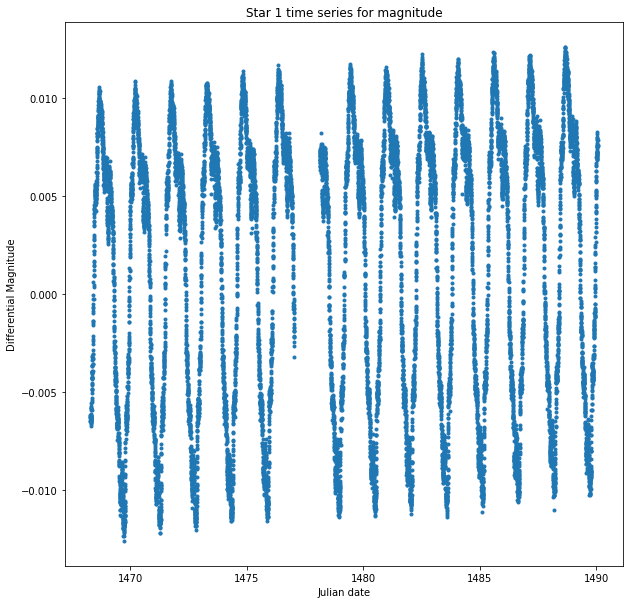

In [10]:
plt.figure(figsize=(10,10))
plt.plot(first['Julian date'], first['Magnitude'], '.')
plt.xlabel('Julian date')
plt.ylabel('Differential Magnitude')
plt.title('Star 1 time series for magnitude')

**Figure 1:** Time series plot of the first data set.

Text(0.5, 1.0, 'Star 2 time series for magnitude')

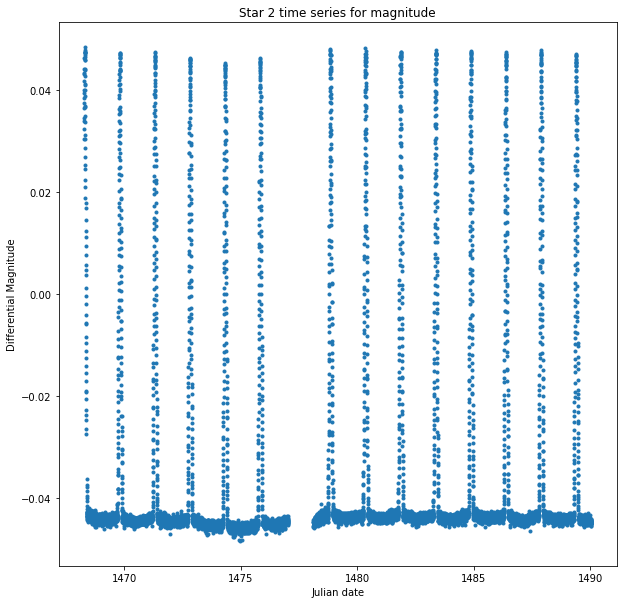

In [11]:
plt.figure(figsize=(10,10))
plt.plot(second['Julian date'], second['Magnitude'], '.')
plt.xlabel('Julian date')
plt.ylabel('Differential Magnitude')
plt.title('Star 2 time series for magnitude')

**Figure 2:** Time series plot of the second data set.

Text(0.5, 1.0, 'Star 3 time series for magnitude')

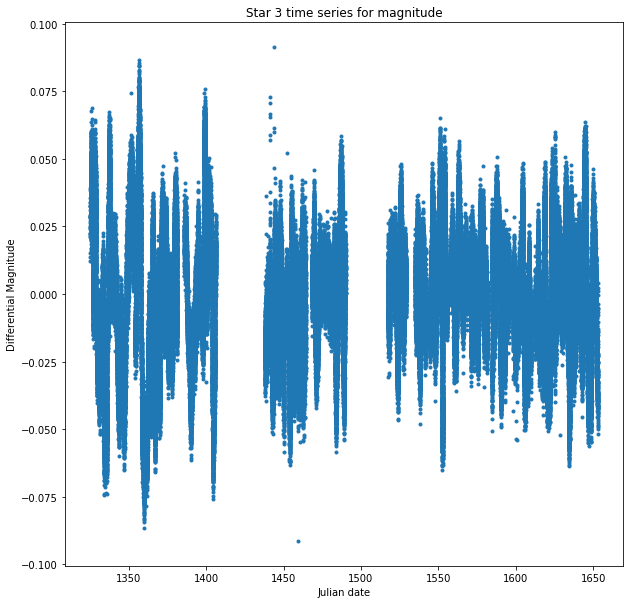

In [12]:
plt.figure(figsize=(10,10))
plt.plot(third['Julian date'], third['Magnitude'], '.')
plt.xlabel('Julian date')
plt.ylabel('Differential Magnitude')
plt.title('Star 3 time series for magnitude')

**Figure 3:** Times series plot of the third data set.

Now that you have plotted each time series, you can probably make an educated guess as to what type of variability (periodic, cyclical or stochastic) is present in each of them. Add a text cell below to put your best "guess" (prediction required for full marks, even if it is wrong or disagrees with answer later in the assignment).

Solely from the plots of the time series of the data sets, I believe that the first set corresponds to a periodic signal, the second set corresponds to a cyclical signal, and the third set corresponds to a stochastic signal. These predictions are based solely upon the shape of each time series with very little if any quantitative evidence.

# **Computing Lomb-Scargle periodograms for each time series**

Using the package loaded above (LombScargle), compute the periodogram (either the power spectrum or the amplitude spectrum, as discussed in class) for each time series, and then plot each periodogram, making sure to properly label the axes and to identify each star. Make sure to choose the frequency range wisely.

For more documentation on the LombScargle package: https://docs.astropy.org/en/stable/api/astropy.timeseries.LombScargle.html#astropy.timeseries.LombScargle

For the normalization, make sure to use "psd" so that we can recover units.

In [0]:
fourier_1 = LombScargle(first['Julian date'], first['Magnitude'], normalization='psd').autopower()
fourier_2 = LombScargle(second['Julian date'], second['Magnitude'], normalization='psd').autopower()
fourier_3 = LombScargle(third['Julian date'], third['Magnitude'], normalization='psd').autopower()

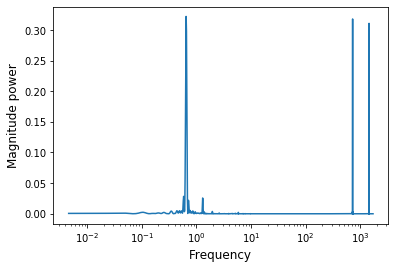

In [14]:
plt.figure()
plt.plot(fourier_1[0], fourier_1[1])
plt.ylabel("Magnitude power", fontsize="large")
plt.xlabel("Frequency", fontsize="large")
plt.xscale("log")

**Figure 4:** Periodogram for the first data set using the Lomb-Scargle method.

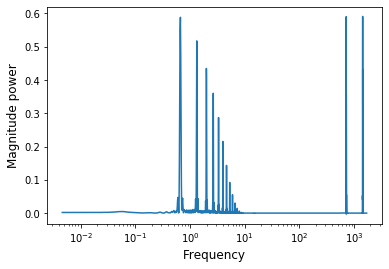

In [15]:
plt.figure()
plt.plot(fourier_2[0], fourier_2[1])
plt.ylabel("Magnitude power", fontsize="large")
plt.xlabel("Frequency", fontsize="large")
plt.xscale("log")

**Figure 5:** Periodogram for the second data set using the Lomb-Scargle method.

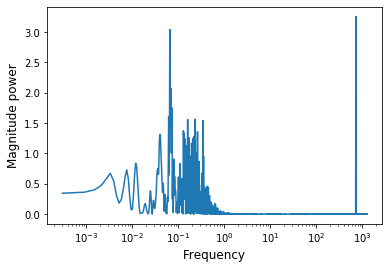

In [16]:
plt.figure()
plt.plot(fourier_3[0], fourier_3[1])
plt.ylabel("Magnitude power", fontsize="large")
plt.xlabel("Frequency", fontsize="large")
plt.xscale("log")

**Figure 6:** Periodogram for the third data set using the Lomb-Scargle method.

<span style="color:red">**-0 pts: why use log as x-axis scales? log scaling is hard to find out period.**</span>

Based on the periodograms you have plotted, add a text box below and indicate what type of variability is exhibited by each of the stars. If one of the stars exhibits *periodic* variations, please also indicate the value of that period.

From analysis of the periodograms of these three signals, it becomes obvious that the first two are periodic signals, with the dominate periodic of the first star being .7 Hz and the dominate period of the second star being around the same .7 Hz to .8 Hz. The last star exhibits a stochastic singal for sure. 

<span style="color:red">**-5 pts: wrong periods calculation.**</span>

# **Phase folding**

For any star above exhibiting periodic variations, you will phase-fold their time series. This is accomplished by rescaling the exogenous variable, dividing it by the period (keep in mind that period = 1/frequency, and that if you have multiple periods, or harmonics, you should divide by the fundamental period). However, only the fractional part (e.g. np.modf(x)[0]) of the period must be considered (which means that the axis containing the exogenous variable will no longer be monotonically increasing; therefore, make sure to reorder the dataset appropriately).

Then, plot the phase-folded light curve(s) and identify them accordingly.

In [17]:
print(np.argmax(fourier_1[1]))

70


In [18]:
print(np.argmax(fourier_2[1][:]))
print(np.argmax(fourier_2[1][:150000]))
print(np.argmax(fourier_2[1][:78000]))

print(np.argmax(fourier_3[1][:1000000]))

156687
78307
72
108


In [19]:
print(fourier_1[0][70], fourier_1[1][70])
print(fourier_2[0][72], fourier_2[1][72])
print(fourier_3[0][108], fourier_3[1][108])

0.647624927208168 0.3219224260486552
0.665975455655127 0.5883631705066954
0.06624020162405016 3.038757100592577


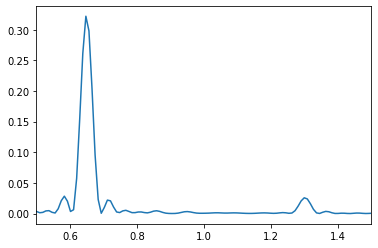

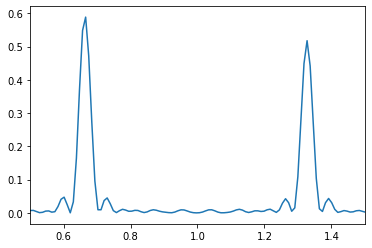

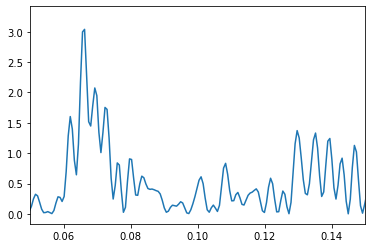

In [20]:
plt.plot(fourier_1[0], fourier_1[1])
plt.xlim(0.5,1.5)
# plt.xscale('log')
# plt.yscale('log')
plt.show()

plt.plot(fourier_2[0], fourier_2[1])
plt.xlim(0.5,1.5)
# plt.xscale('log')
# plt.yscale('log')
plt.show()

plt.plot(fourier_3[0], fourier_3[1])
plt.xlim(0.05,0.15)
# plt.xscale('log')
# plt.yscale('log')
plt.show()

In [0]:
first_folded = pd.DataFrame()

In [0]:
first.columns = [0,1]
second.columns = [0,1]
third.columns = [0,1]

In [0]:
first_folded['phase'] = np.mod(first[0], 1/fourier_1[0][70])
first_folded['dmag'] = first[1]

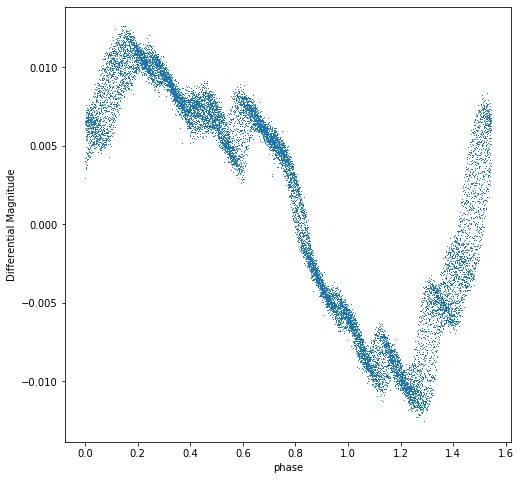

In [40]:
plt.figure(figsize=(8,8))
plt.plot(first_folded.phase, first_folded.dmag, ',')
plt.ylabel('Differential Magnitude')
plt.xlabel('phase');

**Figure 7:** Phase-folded plot for the first star (data set.) This gives us a picture of a peridoic time series.

<span style="color:red">**-2 pts: should scale period into 0-1 scale**</span>

In [0]:
second_folded = pd.DataFrame()
second_folded['phase'] = np.mod(second[0], 1/fourier_2[0][72])
second_folded['dmag'] = second[1]

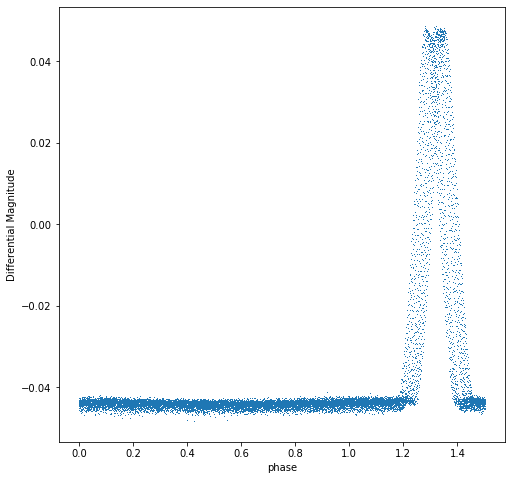

In [41]:
plt.figure(figsize=(8,8))
plt.plot(second_folded.phase, second_folded.dmag, ',')
plt.ylabel('Differential Magnitude')
plt.xlabel('phase');

**Figure 8:** Phase-folded plot for the second star (data set.) It is not well-phased, which gives us a picture of a cyclical time series.

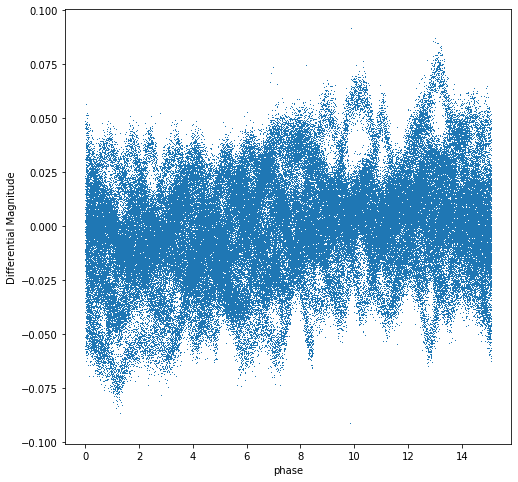

In [42]:
third_folded = pd.DataFrame()

third_folded['phase'] = np.mod(third[0], 1/fourier_3[0][108])
third_folded['dmag'] = third[1]

plt.figure(figsize=(8,8))
plt.plot(third_folded.phase, third_folded.dmag, ',')
plt.ylabel('Differential Magnitude')
plt.xlabel('phase');

plt.show()

**Figure 9:** Phase-folded plot for the third star (data set.) The behavior is evident of a stochastic time series.

# **Binning**

Finally, you will bin the data so that the phased light curve(s) contains 20 bins (from 0 to 1). To do so, you can use the df.resample() method (or any other method you wish), averaging all the points within each bin. Overplot the binned light curve(s) over the original data using a larger symbol size (and perhaps a different color), and connect the binned points with a line. Are 20 bins appropriate? If not, add more bins and explain why.

In [0]:
means_1, edges_1, binnum_1 = scipy.stats.binned_statistic(
    first_folded.phase, first_folded.dmag, bins=20)
means_2, edges_2, binnum_2 = scipy.stats.binned_statistic(
    second_folded.phase, second_folded.dmag, bins=20)
means_3, edges_3, binnum_3 = scipy.stats.binned_statistic(
    third_folded.phase, third_folded.dmag, bins=20)

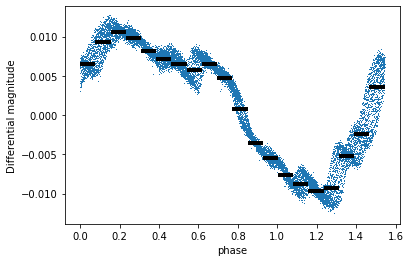

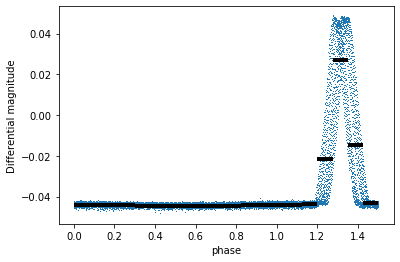

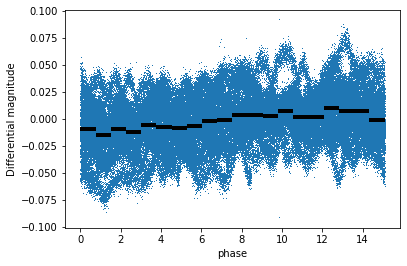

In [44]:
plt.plot(first_folded.phase, first_folded.dmag, ',', zorder=0)
plt.hlines(means_1, edges_1[:-1], edges_1[1:], 'k', lw=4, zorder=1)
plt.xlabel('phase')
plt.ylabel('Differential magnitude')
plt.show()
plt.plot(second_folded.phase, second_folded.dmag, ',', zorder=0)
plt.hlines(means_2, edges_2[:-1], edges_2[1:], 'k', lw=4, zorder=1)
plt.xlabel('phase')
plt.ylabel('Differential magnitude')
plt.show()
plt.plot(third_folded.phase, third_folded.dmag, ',', zorder=0)
plt.hlines(means_3, edges_3[:-1], edges_3[1:], 'k', lw=4, zorder=1)
plt.xlabel('phase')
plt.ylabel('Differential magnitude')
plt.show()

**Figure 10:** Binned representation of the phased time series for each of the three stars, in order. In general, it seems that 20 bins is more or less appropriate for these series. Even dividing the time series up into 20 steps, it seems that the general trend of each time series is preserved.

This concludes the homework assignment!

**Bonus question**: The resulting phase-folded light curve(s) might not be perfectly overlapping, with certain artefacts. Adding a text cell below, comment on what method could help address that issue, and summarily describe how you would go about applying it.

As shown in some of the phased time series, namely the first two, the phase-folding intially did not perfectly line up the time series to overlap. To remedy this, we could attempt to ...